In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
key = os.environ.get('AZURE_SEARCH_KEY', '8466c9c4385649c2ad209aea6b71b0fa')

In [5]:
def search_images_bing(key, term, max_images: int = 150, **kwargs):    
     params = {'q':term, 'count':max_images}
     headers = {"Ocp-Apim-Subscription-Key":key}
     search_url = "https://api.bing.microsoft.com/v7.0/images/search"
     response = requests.get(search_url, headers=headers, params=params)
     response.raise_for_status()
     search_results = response.json()    
     return L(search_results['value'])

In [6]:
characters_name = ['uzumaki naruto', 'hatake kakashi', 'jiraiya', 'tsunade', 'orochimaru', 'nara shikamaru', 'uchiha sasuke',
                  'uchiha utachi']
path = Path('characters')

In [7]:
if not path.exists():
    path.mkdir()
    for char in characters_name:
        dest = (path/char)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{char}')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [8]:
fns = get_image_files(path)
fns

(#1189) [Path('characters/uzumaki naruto/00000002.png'),Path('characters/uzumaki naruto/00000005.png'),Path('characters/uzumaki naruto/00000003.jpg'),Path('characters/uzumaki naruto/00000004.jpg'),Path('characters/uzumaki naruto/00000001.jpg'),Path('characters/uzumaki naruto/00000011.png'),Path('characters/uzumaki naruto/00000009.jpg'),Path('characters/uzumaki naruto/00000007.png'),Path('characters/uzumaki naruto/00000000.jpg'),Path('characters/uzumaki naruto/00000008.jpg')...]

In [9]:
failed = verify_images(fns)
failed

(#11) [Path('characters/hatake kakashi/00000101.jpg'),Path('characters/hatake kakashi/00000106.png'),Path('characters/hatake kakashi/00000123.jpg'),Path('characters/jiraiya/00000024.jpg'),Path('characters/jiraiya/00000047.jpg'),Path('characters/jiraiya/00000149.jpg'),Path('characters/tsunade/00000133.jpg'),Path('characters/orochimaru/00000033.jpg'),Path('characters/orochimaru/00000083.jpg'),Path('characters/uchiha sasuke/00000137.jpg')...]

In [10]:
failed.map(Path.unlink);

In [11]:
characters = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = characters.dataloaders(path)

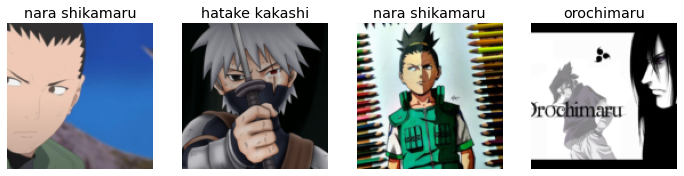

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

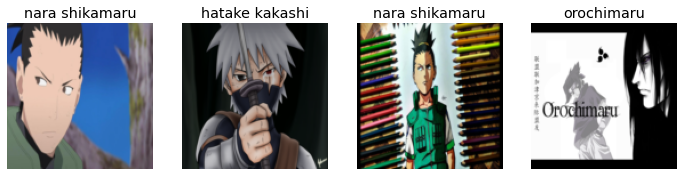

In [16]:
characters = characters.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = characters.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

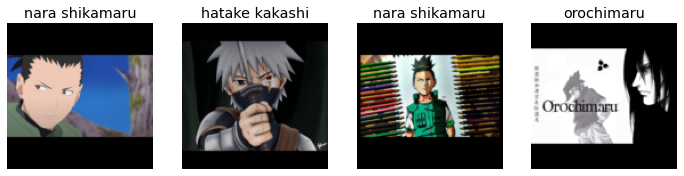

In [17]:
characters = characters.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = characters.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

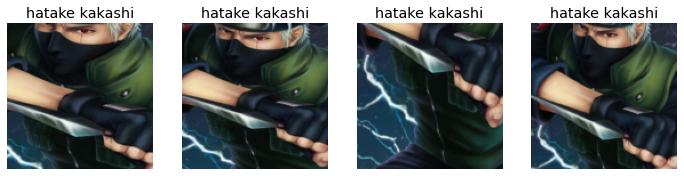

In [18]:
characters = characters.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = characters.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

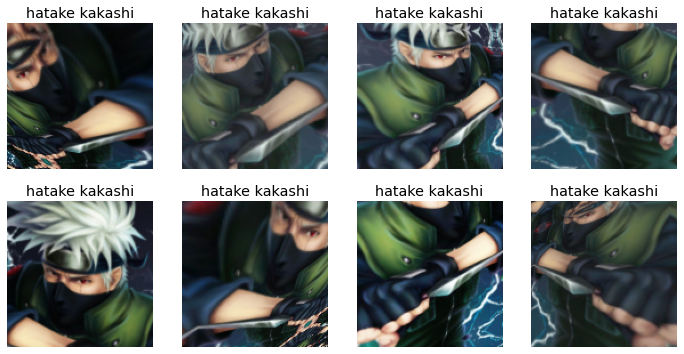

In [19]:
characters = characters.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = characters.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [20]:
characters = characters.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = characters.dataloaders(path)

In [21]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.815389,1.309944,0.446809,00:56


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.517138,1.011493,0.382979,01:17
1,1.255198,0.803691,0.255319,01:14
2,1.007610,0.717697,0.234043,01:15
3,0.828616,0.660802,0.204255,01:17
4,0.685377,0.717236,0.212766,01:15
5,0.582286,0.734953,0.200000,01:17
6,0.504621,0.740481,0.212766,01:12
7,0.435989,0.730440,0.208511,01:12


/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: U

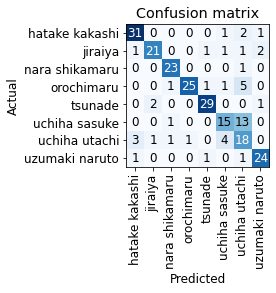

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

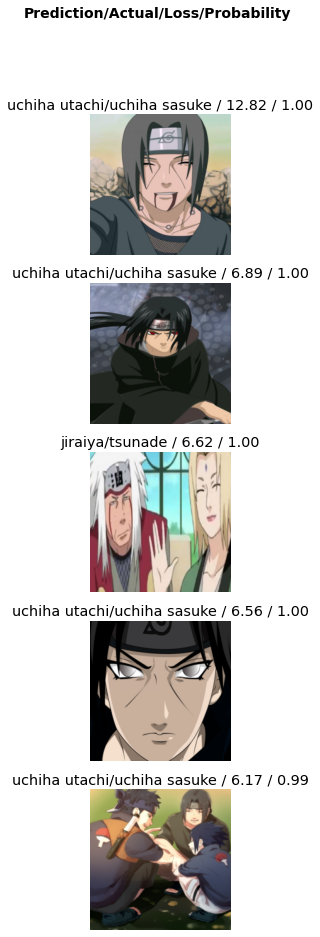

In [26]:
interp.plot_top_losses(5, nrows=5)

In [27]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/envs/fastai/lib/python3.8/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [32]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

export.pkl is the trained model
below is a test predictions

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description='Classify')

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
btn_upload = widgets.FileUpload()

In [ ]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])